# Определение перспективного тарифа для телеком компании  

## Описание проекта  

**На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа**



## Содержание  


* [1.Описание данных и задач](#данные)
* [2.Импорт библиотек и изучение общей информации](#импорт)
    * [2.1 Датафрейм "Tariffs" (Информация о тарифах)](#тариф) 
    * [2.2 Датафрейм "Calls" (Информация о звонках)](#звонки)
    * [2.3 Датафрейм "Users" (Информация о пользователях)](#пользователи)
    * [2.4 Датафрейм "Messages" (Информация о сообщениях)](#смс)    
    * [2.5 Датафрейм "Internet" (Информация об интернет-сессиях)](#интернет)    
* [3.Формирование общего датафрейма](#общийДФ)
    * [3.1 Изменение типа данных столбцов с датами и добавление столбцов "month"](#общийДФД)
    * [3.2 Подсчёт для пользователей количества звонков, израсходованных минут, смс, объёма израсходованного интернета](#общийДФИ)
    * [3.3 Формирование общего датафрейма "total_data"](#общийДФДФ)    
    * [3.4 Работа с пропущенными значениями общего датафрейма](#общийДФП)  
    * [3.5 Расчёт помесячного перерасхода пользователем пакетов услуг в рамках тарифа](#общийДФПЕР)
    * [3.6 Расчёт помесячной выручки с пользователя](#общийДФВЫР)  
    * [3.7 Расчёт переплаты сверх тарифа по пользователям](#общийДФПЛ) 
    * [3.8 Категоризация пользователей по наличию оплат сверх тарифа и по территориальному признаку](#общийДФКАТ) 
    * [3.9 Анализ переплат по тарифам](#общийДФПЕРТАР) 
* [4.Анализ данных](#анализ)
    * [4.1 Функции для построения диаграмм размаха и расчета доверительных интервалов](#анализФДР)
    * [4.2 Диаграмма размаха "Объём использованного интернет-траффика](#анализДРИ)
    * [4.3 Диаграмма размаха "Количество использованных минут](#анализДРМ)    
    * [4.4 Диаграмма размаха "Количество отправленных сообщений](#анализДРС)  
    * [4.5 Функция для построения гистограмм для отфильтрованных от выбросов данных и расчета дисперсии, среднего, медианы и стандартного отклонения](#анализФГ)
    * [4.6 Гистограмма количества использованных минут](#анализГМ)  
    * [4.7 Гистограмма объёма использованного интернет-трафика](#анализГИ) 
    * [4.8 Гистограмма количества отправленных сообщений](#анализГС) 
* [5.Проверка гипотез](#гипотезы)  
    * [5.1 Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#гипотеза1)
    * [5.2 Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;](#гипотеза2)
* [6.Общий вывод](#вывод)     

# 1. Описание данных <a name="данные"></a>


### Описание тарифов

#### Тариф «Смарт»  

1.	Ежемесячная плата: 550 рублей  

2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  

3.	Стоимость услуг сверх тарифного пакета:  

•	минута разговора: 3 рубля  

•	сообщение: 3 рубля  

•	1 Гб интернет-трафика: 200 рублей     


#### Тариф «Ультра»  

1.	Ежемесячная плата: 1950 рублей  

2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

3.	Стоимость услуг сверх тарифного пакета:   

•	минута разговора: 1 рубль  

•	сообщение: 1 рубль  

•	1 Гб интернет-трафика: 150 рублей  


### Таблица users (информация о пользователях):  

•	user_id — уникальный идентификатор пользователя  
•	first_name — имя пользователя  
•	last_name — фамилия пользователя  
•	age — возраст пользователя (годы)  
•	reg_date — дата подключения тарифа (день, месяц, год)  
•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
•	city — город проживания пользователя  
•	tariff — название тарифного плана  

### Таблица calls (информация о звонках):  

•	id — уникальный номер звонка  
•	call_date — дата звонка  
•	duration — длительность звонка в минутах  
•	user_id — идентификатор пользователя, сделавшего звонок  

### Таблица messages (информация о сообщениях):  

•	id — уникальный номер сообщения  
•	message_date — дата сообщения  
•	user_id — идентификатор пользователя, отправившего сообщение  

### Таблица internet (информация об интернет-сессиях):  

•	id — уникальный номер сессии   
•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
•	session_date — дата интернет-сессии  
•	user_id — идентификатор пользователя  

### Таблица tariffs (информация о тарифах):  

•	tariff_name — название тарифа  
•	rub_monthly_fee — ежемесячная абонентская плата в рублях  
•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
•	messages_included — количество сообщений в месяц, включённых в абонентскую плату  
•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  


# Задачи:

### 1. Подготовка данных  

•	Приведем данные к нужным типам;  

•	Найдем и исправим ошибки в данных.  


### 2. Расчет данных для каждого пользователя:  

•	количество сделанных звонков и израсходованных минут разговора по месяцам;  

•	количество отправленных сообщений по месяцам;  

•	объем израсходованного интернет-трафика по месяцам;  

•	помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).  

### 3. Анализ данных  

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.


### 4. Проверка гипотез  

•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;  

•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  


## 2. Импорт библиотек и изучение общей информации <a name="импорт"></a>

In [1]:
# импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# сохраняем данные  в переменные calls, internet, messages,  tariffs, users
calls = pd.read_csv('')
internet = pd.read_csv('')
messages = pd.read_csv('')
tariffs = pd.read_csv('')
users = pd.read_csv('')

Напишем функцию с помощью которой будем выводить информацию о датафреймах

In [3]:
def total_info(data, name):
    print(name)
    display(data.head())
    print('*************************************')
    display(data.info()) 
    print('*************************************')
    print("Число дубликатов:", data.duplicated().sum())
    print('*************************************')

Приступим к ознакомлению с данными.

**Датафрейм "Tariffs" (Информация о тарифах)**<a name="тариф"></a>

In [4]:
total_info(tariffs, 'Информация о тарифах')

Информация о тарифах


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

*************************************
Число дубликатов: 0
*************************************


Данные чистые, ничего менять не надо.

**Датафрейм "Calls" (Информация о звонках)**<a name="звонки"></a>

In [5]:
total_info(calls, '**Информация о звонках**')

**Информация о звонках**


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

*************************************
Число дубликатов: 0
*************************************


Данные полные, пропусков нет, дубликатов нет.  
Тип данных столбца call_date изменим на datetime.	
Длительность звонка указана с точностью до сотых, в комментариях к тарифам указано, что  "Мегалайн" всегда округляет вверх значения минут и мегабайтов, поэтому округлим значения столбца 'duration' таблицы calls.

In [6]:
calls['duration'] = np.ceil(calls.duration) #округляем вверх значения длительности звонка

Посмотрим на гистограмму распределения длительности звонков

In [7]:
# напишем функцию для прорисовки гистограмм
def hist(df, column, name):
        plot = df[column].plot(title=name, kind='hist', bins=50, ec='black')
        return plot

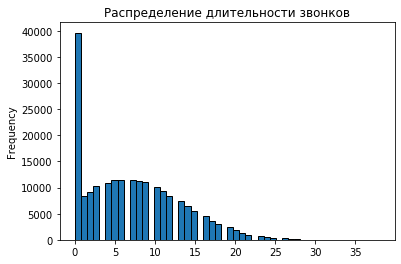

In [8]:
hist(calls,'duration', 'Распределение длительности звонков');

Видим, что очень много звонков имеют длительность 0, посмотрим сколько таких звонков в датафрейме

calls.query('duration == 0.0')

Нулевых звонков почти 40 тысяч, скорее всего это несостоявшиеся звонки: пропущенные, неотвеченные.  
Так как они не расходуют пакет тарифа и никак не влияют на выручку, думаю их можно удалить.  
Кроме того, очень часто если абонент не дозвонился куда-либо или пропустил входящий зонок, он повторит попытку дозвона или перезвонит на пропущенный номер, т.е. нулевые звонки скорее всего "дублируют" состоявшиеся звонки.  

In [9]:
# удаляем звонки длительностью 0.0 минут
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna().reset_index(drop=True)

Посмотрим еще раз на гистограмму распределения

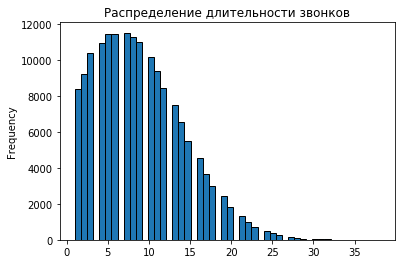

In [10]:
hist(calls,'duration', 'Распределение длительности звонков');

Основная часть звонков длится от 2-3 минут до 10-12 минут

**Датафрейм "Users" (Информация о пользователях)**<a name="пользователи"></a>

In [11]:
total_info(users, 'Информация о пользователях')

Информация о пользователях


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

*************************************
Число дубликатов: 0
*************************************


Дубликатов нет.  
Много пропусков в столбце churn_date(дата прекращения пользования тарифом).  
В комментариях к данным указано, что значения столбца churn_date пропущены, если тариф действовал на момент выгрузки данных.  
Так как эти данные, как и данные о дате подключения тарифа нам не потребуются для решения поставленных задач, оставим их без изменения.

Проверим уникальность пользователей:

In [12]:
print("Число строк в датафрейме users:", users.shape[0])
print("Число уникальных пользователей:", len(users['user_id'].unique()))

Число строк в датафрейме users: 500
Число уникальных пользователей: 500


Всё в порядке, все пользователи уникальны.

Так как нам предстоит сделать предварительный анализ тарифов, посмотрим как распределились клиенты, в соответствии с тарифом, которым они пользуются.  
Напишем функцию для прорисовки графика

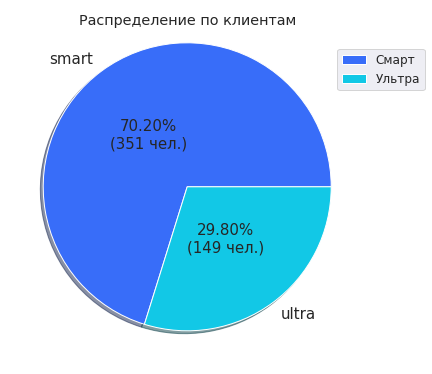

In [13]:
all_users = len(users['user_id'])
sns.set(style ='darkgrid', palette='rainbow')
def func_pct(pct):
    value = float(pct/100.*all_users)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)



axes = users.groupby('tariff')['user_id'].count().plot(kind='pie', fontsize=15,subplots = True,
                                                                     use_index=False, title = 'Распределение по клиентам', 
                                                                     pctdistance=0.45, shadow=True,
                                                                     figsize=(20,5), autopct=lambda pct: func_pct(pct))

plt.tight_layout(pad=0)

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.9,0.9), prop={'size':12})
    ax.set_ylabel('')

Большинство клиентов: больше 70% - выбрали тариф "Смарт", скорее всего это связано с тем, что абонентская плата составляет 550 рублей, против 1950 рублей абонентской платы тарифа "Ультра".

Посмотрим как распределились пользователи в соответствии с городом проживания.

In [14]:
print('Количество городов, где живут абоненты сети "Мегалайн": {} городов'.format(len(users['city'].unique())))

Количество городов, где живут абоненты сети "Мегалайн": 76 городов


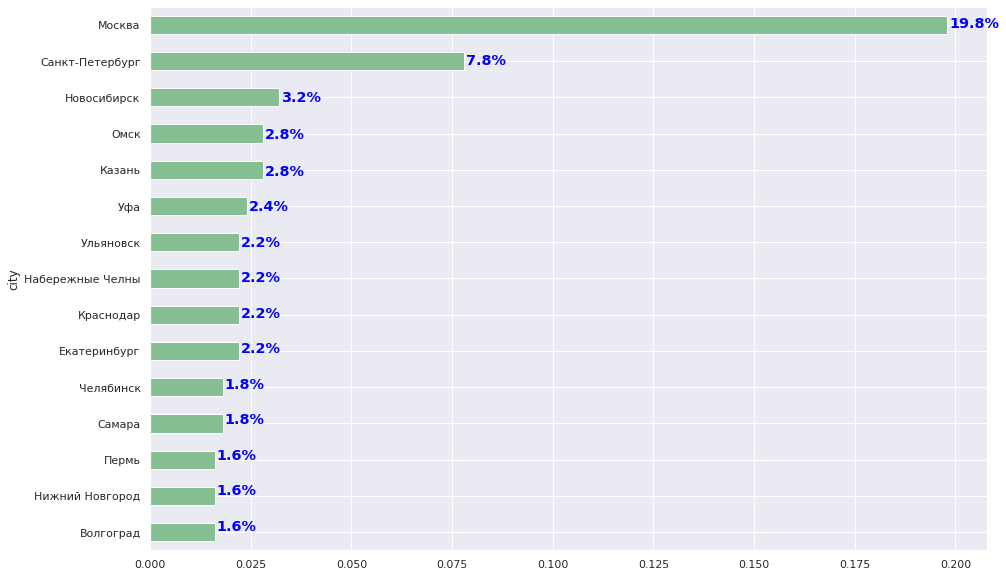

In [15]:
# нарисуем график, отображающий геогрфическое распределение абонентов
df_for_barh = users.groupby('city').size()/all_users
df_for_barh_filtered = df_for_barh[df_for_barh > 0.015].sort_values()
ax = df_for_barh_filtered.plot(kind='barh', color='#86bf91', figsize=(15,10))

labels = dict(df_for_barh_filtered)


i = 0
for city in labels:
    ax.text(labels[city] + 0.0005, i + 0.05, str(round(labels[city]*100, 2)) + '%', 
            fontsize = 'large', fontweight='bold', color='blue')
    if i < 9.7:
        i += 0.98
    else:
        i += 1.02

Ожидаемо, что большинство клиентов из Москвы - почти 20% абонентов, на втором месте Санкт-Петербург - 7.8% у остальных 74 городов от 3.2% и ниже

**Датафрейм "Messages" (Информация о сообщениях)**<a name="смс"></a>

In [16]:
total_info(messages, 'Информация о сообщениях')

Информация о сообщениях


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

*************************************
Число дубликатов: 0
*************************************


Данные полные, пропусков нет, дубликатов нет.  
Тип данных столбца message_date изменим на datetime.

**Датафрейм "Internet" (Информация об интернет-сессиях)**<a name="интернет"></a>

In [17]:
total_info(internet, 'Информация об интернет-сессиях')

Информация об интернет-сессиях


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

*************************************
Число дубликатов: 0
*************************************


Данные полные, пропусков нет, дубликатов нет.  
Тип данных столбца session_date изменим на datetime.  
Объём потраченного за сессию интернет-трафика указан с точностью до сотых, в комментариям к тарифам указано, что  "Мегалайн" всегда округляет вверх значения мегабайтов, поэтому округлим значения столбца 'mb_used' таблицы internet.

In [18]:
internet['mb_used'] = np.ceil(internet.mb_used)

Посмотрим гистограмму распределения объемов потраченного за сессию интернет-траффика

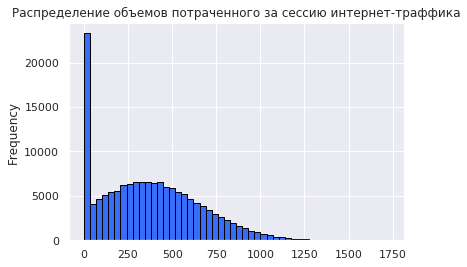

In [19]:
hist(internet,'mb_used', 'Распределение объемов потраченного за сессию интернет-траффика');

На гистограмме отражено значительное количество интернет-сессий объёмом 0.0 Мб, посмотрим сколько их

In [20]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


Почти 20000 таких сессий, так как они не расходуют заложенный в тариф трафик и не влияют на полученную выручку, удалим их.

In [21]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna().reset_index(drop=True)

Проверим и посмотрим ещё раз гистограмму распределения объемов потраченного за сессию интернет-траффика

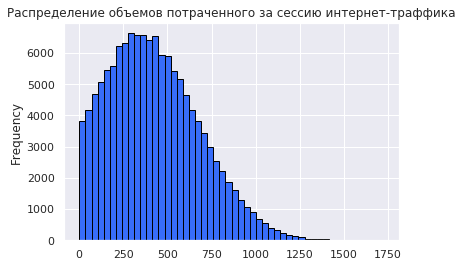

In [22]:
hist(internet,'mb_used', 'Распределение объемов потраченного за сессию интернет-траффика');

В среднем за сессию тратят от 100 до 600 Мб

**Вывод:** данные полные, пропусков почти нет.

У столбцов, содержащих даты активных действий абонентов, необходимо изменить дип данных на datetime.   

Предварительно можно сказать:  

* тариф "Смарт" популярнее, чем "Ультра", "Смарт" использует более 70% абонентов, скорее всего это связано с меньшей абонентской платой;  
* большинство абонентов из Москвы (19.8%) и Санкт-Петербурга(7.8%) на остальные 74 города приходится 72.4%, в среднем менее 1%;
* в среднем разговор длится от 2-3 минут до 10-12 минут;  
* за интернет-сессию в среднем тратится от 100 до 600 Мб;

## 3. Формирование общего датафрейма <a name="общийДФ"></a>

Для проведения анализа тарифов нам потребуется общий датафрейм, но перед формированием изменим тип данных в столбцах с датами на datetime и добавим столбец содержащий месяц, чтобы потом произвести необходимые расчеты активностей абонентов по месяцам.  

**Изменение типа данных столбцов с датами и добавление столбцов "month"** <a name="общийДФД"></a>

In [23]:
# Напишем функцию, которая изменит тип данных и добавит столбец month
def datetime_month(data):
    for df in data:
        for column in df.columns:
            if 'date' in column:
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)

In [24]:
datetime_month([calls, messages, internet])

**Подсчёт для пользователей количества звонков, израсходованных минут, смс, объёма израсходованного интернета** 
<a name="общийДФИ"></a>

Сгруппируем соответствующие датафреймы, чтобы посчитать количество звонков, количество израсходованных минут, количество смс и объём израсходованного интернета

In [25]:
num_of_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
num_of_messages = messages.groupby(['user_id', 'month'])['id'].count()
num_of_internet = internet.groupby(['user_id', 'month']).sum()['mb_used']

**Формирование общего датафрейма** <a name="общийДФДФ"></a>

Сформируем общий датафрейм с помощью метода merge(), сохраним его в переменной total_data

In [26]:
total_data = num_of_calls\
.merge(num_of_messages, on = ['user_id','month'], how = 'left')\
.merge(num_of_internet, on = ['user_id','month'], how = 'left')
total_data = total_data.reset_index()

In [27]:
total_data = total_data.merge(users[['user_id', 'tariff', 'city']], on = 'user_id', how = 'left')

Переименуем столбцы нового датафрейма total_data:
* **user_id** - идентификатор пользователя  
* **month** - месяц расчётов
* **calls_count** - количество звонков в месяц
* **calls_min_sum** - количество использованных минут
* **sms_count** - количество отправленых сообщений
* **internet_mb** - объём потраченного интернет-трафика  
* **tariff** - название тарифного плана
* **city** - город проживания пользователя  

In [28]:
total_data.columns = ['user_id', 'month', 'calls_count', 'calls_min_sum', 'sms_count', 'internet_mb', 'tariff', 'city']

Посмотрим на новую таблицу

In [29]:
total_info(total_data, 'Информация об общей таблице')

Информация об общей таблице


,user_id,month,calls_count,calls_min_sum,sms_count,internet_mb,tariff,city
0,1000,5,17,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46,466.0,57.0,14581.0,ultra,Краснодар


*************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 8 columns):
user_id          3168 non-null int64
month            3168 non-null int64
calls_count      3168 non-null int64
calls_min_sum    3168 non-null float64
sms_count        2673 non-null float64
internet_mb      3155 non-null float64
tariff           3168 non-null object
city             3168 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 222.8+ KB


None

*************************************
Число дубликатов: 0
*************************************


Есть пропуски в столбцах sms_count, internet_mb, посмотрим на них поближе

**Работа с пропущенными значениями общего датафрейма** <a name="общийДФП"></a>

In [30]:
total_data[total_data['sms_count'].isnull()]

,user_id,month,calls_count,calls_min_sum,sms_count,internet_mb,tariff,city
8,1001,11,45,430.0,NaN,18452.0,smart,Москва
9,1001,12,47,414.0,NaN,14053.0,smart,Москва
42,1006,2,3,42.0,NaN,1395.0,smart,Ульяновск
43,1006,3,36,286.0,NaN,17309.0,smart,Ульяновск
44,1006,4,38,356.0,NaN,13954.0,smart,Ульяновск
...,...,...,...,...,...,...,...,...
3135,1494,8,26,262.0,NaN,6601.0,smart,Омск
3136,1494,9,57,501.0,NaN,16986.0,smart,Омск
3137,1494,10,45,354.0,NaN,17794.0,smart,Омск
3138,1494,11,46,411.0,NaN,18076.0,smart,Омск


In [31]:
total_data[total_data['internet_mb'].isnull()]

,user_id,month,calls_count,calls_min_sum,sms_count,internet_mb,tariff,city
584,1094,5,12,107.0,3.0,NaN,ultra,Новосибирск
1693,1273,5,19,220.0,21.0,NaN,ultra,Курган
1694,1273,6,28,230.0,38.0,NaN,ultra,Курган
1695,1273,7,30,253.0,37.0,NaN,ultra,Курган
1696,1273,8,39,253.0,41.0,NaN,ultra,Курган
1697,1273,9,28,223.0,32.0,NaN,ultra,Курган
1698,1273,10,35,315.0,35.0,NaN,ultra,Курган
1699,1273,11,31,272.0,29.0,NaN,ultra,Курган
1700,1273,12,38,260.0,39.0,NaN,ultra,Курган
2274,1365,10,5,43.0,1.0,NaN,smart,Ростов-на-Дону


Так как в периоды когда обнаружены пропущенные значения есть активность абонентов по другим видам связи, предположим, что в эти периоды абоненты не пользовались интенетом и не отправляли сообщения, поэтому заменим пропуки на 0

In [32]:
total_data = total_data.fillna(0)

Проверим еще раз total_data

In [33]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 8 columns):
user_id          3168 non-null int64
month            3168 non-null int64
calls_count      3168 non-null int64
calls_min_sum    3168 non-null float64
sms_count        3168 non-null float64
internet_mb      3168 non-null float64
tariff           3168 non-null object
city             3168 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 222.8+ KB


Отлично, пропусков больше нет.

**Расчёт помесячного перерасхода пользователем пакетов услуг в рамках тарифа** <a name="общийДФПЕР"></a>

Для анализа тарифов нам потребуется информация о перерасходах абонентов по пакетам услуг, посчитаем по каждому абоненту перерасход (при его наличии) по минутам разговоров, сообщениям и трафику интернета

In [34]:
# напишем функции, которые посчитают нам расходы услуг сверх пакетов включенных в тарифы

# минуты сверх тарифа
def min_over(row):
    tariff = row['tariff']
    short_min = row['calls_min_sum']
    minutes_lim = tariffs.loc[tariffs['tariff_name'] == tariff, 'minutes_included'].array[0]
    min_overlimit = max(short_min - minutes_lim, 0)
    
    return np.ceil(min_overlimit)

# сообщения сверх тарифа
def sms_over(row):
    tariff = row['tariff']
    short_sms = row['sms_count']
    sms_lim = tariffs.loc[tariffs['tariff_name'] == tariff, 'messages_included'].array[0]
    sms_overlimit = max(short_sms - sms_lim, 0)
    
    return sms_overlimit

# Мб интернета сверх тарифа
def internet_over(row):
    tariff = row['tariff']
    short_internet = row['internet_mb']
    internet_lim = tariffs.loc[tariffs['tariff_name'] == tariff, 'mb_per_month_included'].array[0]
    internet_overlimit = max(short_internet - internet_lim, 0)
    
    return np.ceil(internet_overlimit)

Добавим в датафрейм total_data столбцы:
* **min_overlimit** - количество минут использованных сверх тарифа
* **sms_overlimit** - количество сообщений отправленных сверх тарифа
* **internet_overlimit** - количество Мб интернет израсходованного сверх тарифа

In [35]:
total_data['min_overlimit'] = total_data.apply(min_over, axis = 1)
total_data['sms_overlimit'] = total_data.apply(sms_over, axis = 1)
total_data['internet_overlimit'] = total_data.apply(internet_over, axis = 1)

**Расчёт помесячной выручки с пользователя** <a name="общийДФВЫР"></a>

Теперь приступим к расчету помесячной выручки с каждого пользователя: для этого данные о перерасходах услуг умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану

In [36]:
# напишем функцию для расчета выручки
def month_payment_calculation(row):
    min_overlimit = row['min_overlimit']
    sms_overlimit = row['sms_overlimit']
    internet_overlimit = row['internet_overlimit']
    tariff = row['tariff']
      
    # вычисляем переплату по звонкам. 
    min_overpay = min_overlimit * tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_minute'].array[0]
    
    # вычисляем переплату по сообщениям. 
    sms_overpay = sms_overlimit * tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_message'].array[0]
    
     # вычисляем переплату по интернету. 
    internet_overpay = np.ceil(internet_overlimit / 1024) * tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_gb'].array[0]
    
    # вычисляем абонентскую плату.
    tariff_pay = tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].array[0]
    
    # вычисляем выручку.
    total_pay = tariff_pay + internet_overpay + min_overpay + sms_overpay
 
    
    return total_pay

Добавим к датафрейму total_data столбец **user_revenue**, который будет содержать данные о выручке по каждому клиенту

In [37]:
total_data['user_revenue'] = total_data.apply(month_payment_calculation, axis = 1)

**Расчёт переплаты сверх тарифа по пользователям** <a name="общийДФПЛ"></a>

Теперь расчитаем по каждому абоненту какую сумму он оплачивает за услуги связи сверх тарифа

In [38]:
# напишем функцию, с помощью которой расчитаем суммы переплат по абонентам
def overpay(row):
    tariff = row['tariff']
    total_pay = row['user_revenue']
    tariff_pay = tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].array[0]
    over_pay = total_pay - tariff_pay
    if over_pay > 0:
        return over_pay
    else:
        return 0
    

In [39]:
total_data['over_pay'] = total_data.apply(overpay, axis = 1)

Добавим к датафрейму total_data столбец **over_pay**, который будет содержать данные о сумме, оплаченной абонентом сверх тарифа

**Категоризация пользователей по наличию оплат сверх тарифа и по территориальному признаку** <a name="общийДФКАТ"></a>

Для дальнейшего анализа нам потребуется категоризация пользователей по наличию оплат сверх тарифа, для этого добавим столбец **over_pay_kat** в котором "0" соответствует значению "нет переплат", "1" - соответствует значению "есть переплаты"

In [40]:
# напишем функцию для категоризации по оплатам сверх тарифа
def overpay_kat(row):
    if row['over_pay'] == 0:
        return 0
    else:
        return 1

In [41]:
total_data['over_pay_kat'] = total_data.apply(overpay_kat, axis = 1)

Так же потребуется категоризация пользователей по территориальному признаку, для этого добавим столбец **city_kat** в котором "Москва" соответствует городу проживания "Москва", "Регион" - соответствует городам проживания, кроме Москвы

In [42]:
# напишем функцию для категоризации по территориальному признаку
def city_kat(row):
    if row['city'] == 'Москва':
        return row['city']
    else:
        return 'Регион'

In [43]:
total_data['city_cat'] = total_data.apply(city_kat, axis=1)

Посмотрим на обновлённый датафрейм total_data

In [44]:
total_info(total_data, 'Информация об общей таблице')

Информация об общей таблице


,user_id,month,calls_count,calls_min_sum,sms_count,internet_mb,tariff,city,min_overlimit,sms_overlimit,internet_overlimit,user_revenue,over_pay,over_pay_kat,city_cat
0,1000,5,17,159.0,22.0,2256.0,ultra,Краснодар,0.0,0.0,0.0,1950.0,0.0,0,Регион
1,1000,6,28,172.0,60.0,23257.0,ultra,Краснодар,0.0,0.0,0.0,1950.0,0.0,0,Регион
2,1000,7,41,340.0,75.0,14016.0,ultra,Краснодар,0.0,0.0,0.0,1950.0,0.0,0,Регион
3,1000,8,42,408.0,81.0,14070.0,ultra,Краснодар,0.0,0.0,0.0,1950.0,0.0,0,Регион
4,1000,9,46,466.0,57.0,14581.0,ultra,Краснодар,0.0,0.0,0.0,1950.0,0.0,0,Регион


*************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 15 columns):
user_id               3168 non-null int64
month                 3168 non-null int64
calls_count           3168 non-null int64
calls_min_sum         3168 non-null float64
sms_count             3168 non-null float64
internet_mb           3168 non-null float64
tariff                3168 non-null object
city                  3168 non-null object
min_overlimit         3168 non-null float64
sms_overlimit         3168 non-null float64
internet_overlimit    3168 non-null float64
user_revenue          3168 non-null float64
over_pay              3168 non-null float64
over_pay_kat          3168 non-null int64
city_cat              3168 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 396.0+ KB


None

*************************************
Число дубликатов: 0
*************************************


**Анализ переплат по тарифам** <a name="общийДФПЕРТАР"></a>

Посмотрим как распределилась выручками между абонентами двух тарифов, нарисуем диаграмму

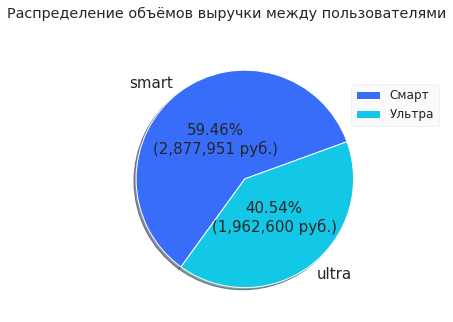

In [45]:
all_revenue = total_data['user_revenue'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)


axes = total_data.groupby('tariff')['user_revenue'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True,
                                                                     title = 'Распределение объёмов выручки между пользователями',
                                                                     pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

Ранее мы выяснили, что 70% абонентов пользуются тарифом "Смарт", это, с учётом разрыва в размере абонентской платы между тарифами (550 руб.- "Смарт" и 1950 руб.- "Ультра"), могло привести к распределению выручки в бОльшую сторону для абонентов "Ультра", но раз этого не произошло и почти 60% выручки приносят пользователи тарифа "Смарт", значит многие абоненты "Смарт" докупают услуги сверх тарифа, проверим так ли это.

Для сравнения двух тарифов создадим два новых датафрейма по тарифам, с помощью метода query()

In [46]:
total_data_smart = total_data.query('tariff == "smart"') # датафрейм с данными по абонентам "Смарт"
total_data_ultra = total_data.query('tariff == "ultra"') # датафрейм с данными по абонентам "Ультра"

Нарисуем диаграммы, которые покажут какой процент абонентов каждого тарифа докупают услуги, а какой процент остаётся в рамках абонентской платы

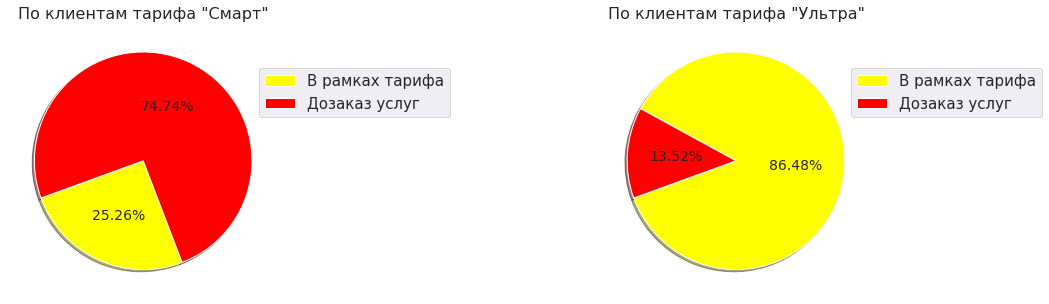

In [47]:
filter_list = ['smart', 'ultra']
titles_list = ['По клиентам тарифа "Смарт"', 'По клиентам тарифа "Ультра"']
rows = 1
cols = 2
filter_list_counter = 0

sum_smart = total_data_smart['user_id'].count()
sum_ultra = total_data_ultra['user_id'].count()

annot_labels = ['В рамках тарифа', 'Дозаказ услуг']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_smart)
    else:
        value = float(pct/100.*sum_ultra)
    return "{:.2f}%".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))

for r in range(rows):
    for c in range(cols):
        colors = ['yellow', 'red']
        filter_data = total_data[total_data['tariff'] == filter_list[filter_list_counter]].groupby('over_pay_kat')['user_id']
        ax = filter_data.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True,  colors=colors,
                                           title=titles_list[filter_list_counter], pctdistance=0.55, figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), startangle=200, ax=axes[c], labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['В рамках тарифа', 'Дозаказ услуг'], bbox_to_anchor=(0.897,0.87), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)
    ax.title.set_position([0.5, 1.15])

Как мы и предполагали почти 75% абонентов "Смарт" дозаказывают услуги, т.е. им не хватает пакетов включенных в тариф.  
А абоненты "Ультра" напротив в большинстве случаев (86.48%) остаются в рамках услуг включенных в тариф.  


**Посмотрим какие услуги дозаказывают пользователи обоих тарифов**

In [48]:
(total_data.groupby('tariff').sum()[['min_overlimit', 'sms_overlimit', 'internet_overlimit']]).reset_index()

,tariff,min_overlimit,sms_overlimit,internet_overlimit
0,smart,92739.0,12928.0,6160391.0
1,ultra,0.0,0.0,723689.0


Абоненты "Смарт" дозаказывают все виды услуг и минуты, и сообщения, и интернет.  
Абоненты "Ультра" дозаказывают только пакет интернет, по остальным пакетам услуг они остаются в рамках тарифа 

**Посмотрим как распределились суммы переплат для каждого тарифа, построим гистограмму оплат сверх тарифа "Смарт"**

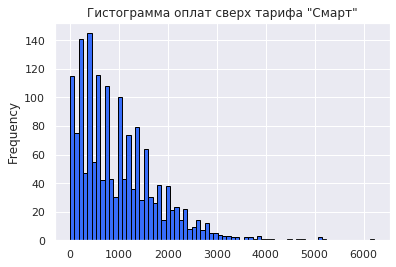

In [49]:
total_data_smart.query('over_pay > 0')['over_pay'].plot(kind='hist', 
                                                        title='Гистограмма оплат сверх тарифа "Смарт"', ec='black', bins=70);

Большая часть абонентов , если выходит за рамки лимита, переплачивает до 1000 рублей, с учётом того, что абонентская плата 550 рублей, это довольно много, посмотрим на гистограмму  поближе, ограничим сумму переплат 1000 рублями

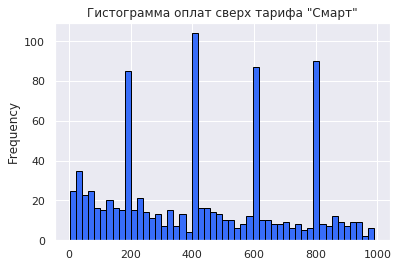

In [50]:
total_data_smart.query('0 < over_pay < 1000')['over_pay'].plot(kind='hist', 
                                                        title='Гистограмма оплат сверх тарифа "Смарт"', ec='black', bins=50);

В основном переплаты кратные 200 рублям, смотрим в описание тарифов и видим, что зачастую это покупка дополнительного пакета интернет-трафика: 1Гб - 200 рублей

**Теперь посмотрим как распределились суммы переплат для абонентов "Ультра", построим гистограмму** 

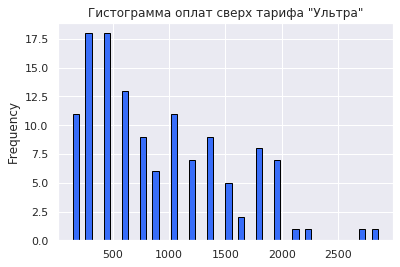

In [51]:
total_data_ultra.query('over_pay > 0')['over_pay'].plot(kind='hist', 
                                                        title='Гистограмма оплат сверх тарифа "Ультра"', ec='black', bins=50);

Большая часть абонентов, если покупает услуги сверх включенных в тариф, переплачивает до 1200 рублей, посмотрим на гистограмму  поближе, ограничим сумму переплат 1200 рублями

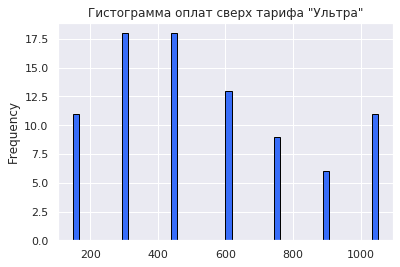

In [52]:
total_data_ultra.query('0< over_pay < 1200')['over_pay'].plot(kind='hist', 
                                                        title='Гистограмма оплат сверх тарифа "Ультра"', ec='black', bins=50);

Очевидно, что суммы переплат кратны 150 рублям, обращаемся к описанию тарифа "Ультра": дополнительный пакет интернет трафика 1 Гб - 150 рублей. 

**Вывод:** 

* бОльшую часть выручки (59.46%) компании "Мегалайн" приносят абоненты тарифа "Смарт", это происходит вследствие того, что им не хватает пакетов услуг включенных в тариф и они докупают услуги;

* почти 75% абонентов тарифа "Смарт" дозаказывают услуги, тогда как 86.48% абонентов тарифа "Ультра" остаются в рамках абонентской платы;

* абоненты "Смарт" докупают все виды услуг связи, но чаще интернет-трафик. Большая часть переплат у клиентов, которые докупают услуги, до 1000 рублей;    

* абоненты "Ультра" докупают только пакет интернет-трафика. Большая часть переплат у клиентов, которые докупают услуги, до 1200 рублей;    

# 4. Анализ данных <a name="анализ"></a>

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.  
Сначала построим диаграммы размаха по всем рассматриваемым данным (длительность звонка, количество отправленных сообщений, объем использованного интернет-трафика), чтобы зафиксировать выбросы и отфильтровать их при дальнейшем анализе.   
Расчитаем доверительные интервалы для каждой из услуг

**Функции для построения диаграмм размаха и расчета доверительных интервалов** <a name="анализФДР"></a>

Напишем функцию для построения диаграмм размаха

In [53]:
def box_plot_func(column, name):
    total_data_tariff = \
    total_data\
    .groupby('tariff', as_index=False)\
    .agg({column:'median'})\
    .sort_values(by='tariff', ascending=True).reset_index()

    plt.figure(figsize=(9,5))
    ax = sns.boxplot(x='tariff', y=column, data=total_data, showfliers=False, order=total_data_tariff['tariff'].to_list())
    ax.set_xlabel('')
    plt.title(name)
    plt.grid(True)
    

Напишем функцию для расчета доверительных интервалов

In [54]:

def interval(column):
    quantiles_s = total_data_smart[column].quantile([0.25, 0.75])
    iqr_s = quantiles_s.iloc[1] - quantiles_s.iloc[0]
    interval_smart=(max(0, quantiles_s.iloc[0] - 1.5 * iqr_s), quantiles_s.iloc[1] + 1.5 * iqr_s)
    quantiles_u = total_data_ultra[column].quantile([0.25, 0.75])
    iqr_u = quantiles_u.iloc[1] - quantiles_u.iloc[0]
    interval_ultra=(max(0, quantiles_u.iloc[0] - 1.5 * iqr_u), quantiles_u.iloc[1] + 1.5 * iqr_u)
    print('Границы интервала для столбца "{}" тарифа {}: {}'.format(column, total_data_smart['tariff'].array[0], interval_smart))
    print('Границы интервала для столбца "{}" тарифа {}: {}'.format(column, total_data_ultra['tariff'].array[0], interval_ultra))
    
    return interval_smart, interval_ultra      

**Диаграмма размаха "Объём использованного интернет-траффика"** <a name="анализДРИ"></a>

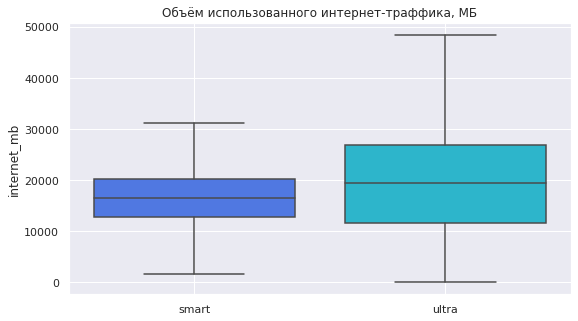

In [55]:
box_plot_func('internet_mb', 'Объём использованного интернет-траффика, МБ')

In [56]:
int_int_smart, int_int_ultra = interval('internet_mb');

Границы интервала для столбца "internet_mb" тарифа smart: (1578.0, 31162.0)
Границы интервала для столбца "internet_mb" тарифа ultra: (0, 49717.25)


**Диаграмма размаха "Количество использованных минут"** <a name="анализДРМ"></a>

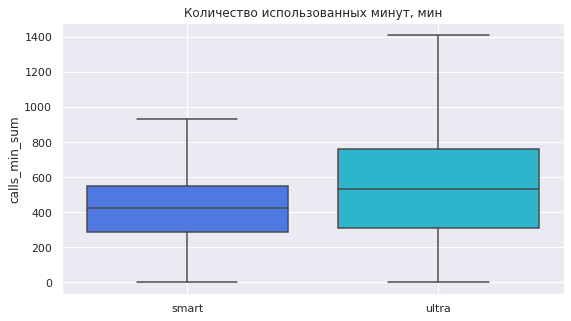

In [57]:
box_plot_func('calls_min_sum', 'Количество использованных минут, мин')

In [58]:
int_min_smart, int_min_ultra = interval('calls_min_sum');

Границы интервала для столбца "calls_min_sum" тарифа smart: (0, 937.5)
Границы интервала для столбца "calls_min_sum" тарифа ultra: (0, 1428.5)


**Диаграмма размаха "Количество отправленных сообщений"** <a name="анализДРС"></a>

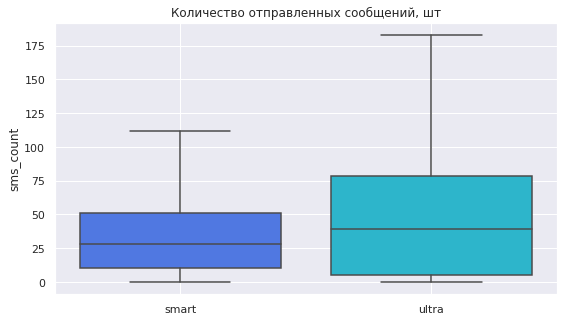

In [59]:
box_plot_func('sms_count', 'Количество отправленных сообщений, шт')

In [60]:
int_sms_smart, int_sms_ultra = interval('sms_count');

Границы интервала для столбца "sms_count" тарифа smart: (0, 112.5)
Границы интервала для столбца "sms_count" тарифа ultra: (0, 188.75)


На диаграммах размаха видно, что медианы и нижние границы "усов" для обоих тарифов различаются не значительно, а вот верхние границы "усов" тарифа "Ультра" заметно больше верхних границ тарифа "Смарт", значит распределения данных для тарифа "Ультра" более скошены вправо, для этих данных медиана будет меньше среднего

**Функция для построения гистограмм для отфильтрованных от выбросов данных, расчет дисперсии, среднего, медианы и стандартного отклонения** <a name="анализФГ"></a>

Напишем функцию для прорисовки гистограмм по отфильтрованным от выбросов данным и рассчитаем дисперсию, среднее, медиану и стандартное отклонение

In [61]:
def total_hist(data):
    
    ax = plt.gca()
    func_dict = {'Internet': 'internet_mb', 'Calls': 'calls_min_sum', 'SMS': 'sms_count'}
    xlims = [(int_int_smart[0], int_int_smart[1]), (int_int_ultra[0], int_int_ultra[1]),
             (int_min_smart[0], int_min_smart[1]), (int_min_ultra[0], int_min_ultra[1]),
             (int_sms_smart[0], int_sms_smart[1]), (int_sms_ultra[0], int_sms_ultra[1])]
    
    filt_column = func_dict[data]

    # оформление в зависимости от рассматриваемых данных
    if data == 'Internet':
        title = 'Гистограмма объёма использованного интернет-трафика, Мб'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        
       
    elif data == 'Calls':
        title = 'Гистограмма количества использованных минут, мин.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
       
    else:
        title = 'Гистограмма количества отправленных сообщений, шт.'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
       
    
    # получаем отфильтрованные от выбросов датафреймы
    filter_smart_data = total_data_smart[(total_data_smart[filt_column] >= xlim1[0]) &
                                           (total_data_smart[filt_column] <= xlim1[1])][filt_column]
    filter_ultra_data = total_data_ultra[(total_data_ultra[filt_column] >= xlim2[0]) &
                                           (total_data_ultra[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filter_smart_data.plot(kind='hist', bins=40, ec='black', ax=ax, color='gray', 
                             title=title, xlim=xlim1, figsize = (12,6), fontsize = 12, alpha = 0.7)
    filter_ultra_data.plot(kind='hist', bins=70, ec='black', ax=ax, color='blue', 
                             title=title, xlim=xlim2, figsize = (12,6), fontsize = 12, alpha = 0.7)
    
    # расчетные данные
    mean_smart = filter_smart_data.mean()
    mean_ultra = filter_ultra_data.mean()
    dispersion_smart = np.var(filter_smart_data, ddof = 1) 
    dispersion_ultra = np.var(filter_ultra_data, ddof = 1)
    std_smart = np.std(filter_smart_data) 
    std_ultra = np.std(filter_ultra_data) 
    median_smart = filter_smart_data.median()
    median_ultra = filter_ultra_data.median()
    
    smart_data = 'Медиана - {:.0f}\nСреднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(median_smart, mean_smart, dispersion_smart, std_smart)
    ultra_data = 'Медиана - {:.0f}\nСреднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(median_ultra, mean_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    # рисуем медианы
    plt.axvline(x=median_smart,linewidth=3, color='darkgray', linestyle='--')
   
    plt.axvline(x=median_ultra,linewidth=3, color='indigo', linestyle='--')
        
    plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})
    
    ax.title.set_size(16)

**Гистограмма количества использованных минут** <a name="анализГМ"></a>

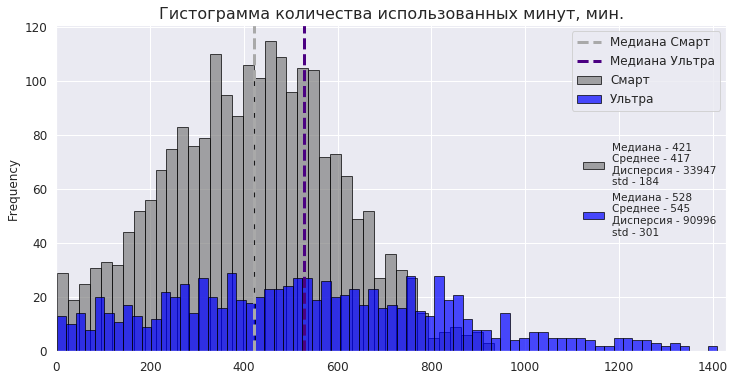

In [62]:
total_hist('Calls')

В основном клиенты тарифа "Смарт" разговаривают от 300 до 500 минут в месяц, медиана равна 421 минута, что ,с учетом того что в тариф включено всего 500 минут, является критическим значением говорит о том, что многоим приходится платить за минуты сверх тарифа.  
Большинство клиентов тарифа "Ультра" не разговаривают по телефону, а те кто пользуется голосовой связью используют в среднем чуть больше 500 минут из 3000 минут включенных в тариф, медиана равна 528 минут.  
Медиана и среднее тарифа "Ультра" больше медианы и средного тарифа "Смарт"

**Гистограмма объёма использованного интернет-трафика** <a name="анализГИ"></a>

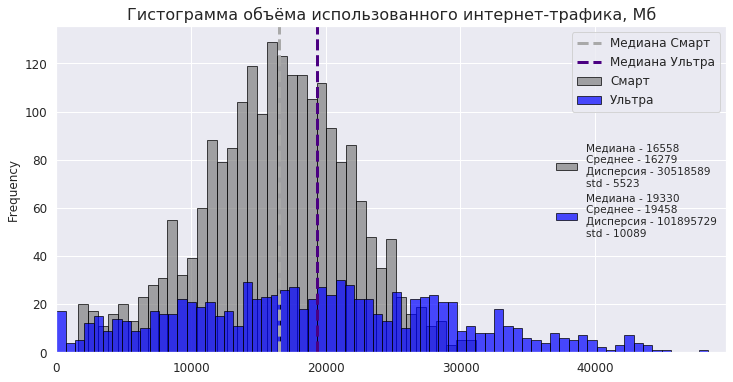

In [63]:
total_hist('Internet')

Медиана тарифа "Смарт" равна 16,2 Гб, что превышает включенные в тариф 15 Гб, на гистограмме видно, что большинство абонентов доплачивают за увеличение объёма интернет-трафика.  
Медиана тарифа "Ультра" равна 18,8 Гб, на гистограмме видно, что лишь небольшая часть абонентов "Смарт" выходят за рамки объёма интернет трафика включенного в тариф

**Гистограмма количества отправленных сообщений** <a name="анализГС"></a>

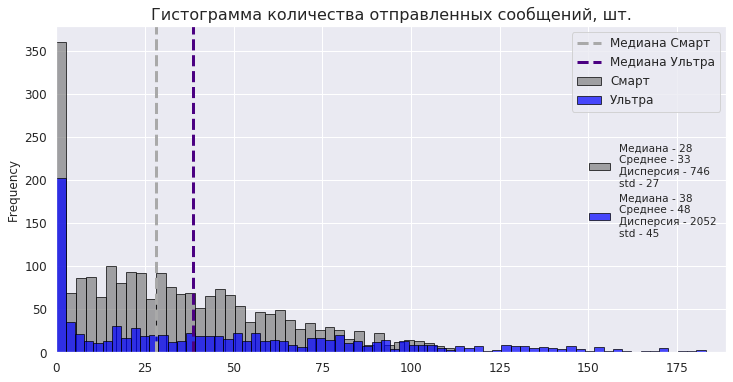

In [64]:
total_hist('SMS')

Сообщения абоненты обоих тарифов практически не отправляют, те кто всё-таки пользуется данной услугой на тарифе "Ультра" отправляют около 50 сообщений, на тарифе "Смарт" - около 30 сообщений.  
Медиана и среднее тарифа "Ультра" больше медианы и средного тарифа "Смарт"

# 5. Проверка гипотез <a name="гипотезы"></a>

### Первая гипотеза для проверки: **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**<a name="гипотеза1"></a>

В формулировке гипотезы идёт речь о сравнении двух средних генеральных совокупностей для независимых переменных, сформулируем нулевую гипотезу:  

**H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна**

Альтернативная гипотеза:  

**H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна**

Сначала построим диаграммы размаха

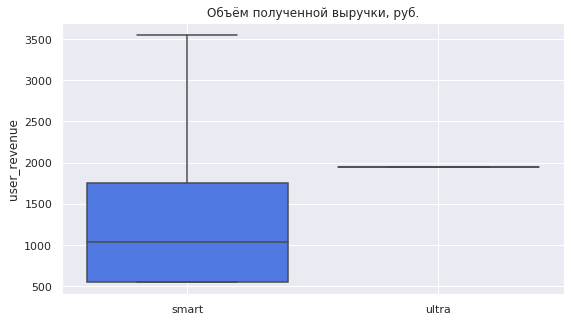

In [65]:
box_plot_func('user_revenue', 'Объём полученной выручки, руб.')

Судя по диаграмме размаха, значения выручки от абонентов "Ультра" располагаются выше и не имеют "пересечений" с большинством значений выручки абонентов тарифа "Смарт" расположенных внутри "ящика", это даёт нам основание предположить, что "нулевую гипотезу" можно будет отвергнуть, проверим наше предположение

Рассчитаем доверительные интервалы для фильтрации данных

In [66]:
int_rev_smart, int_rev_ultra = interval('user_revenue');

Границы интервала для столбца "user_revenue" тарифа smart: (0, 3550.0)
Границы интервала для столбца "user_revenue" тарифа ultra: (1950.0, 1950.0)


Теперь отфильтруем данные в соответствии с интервалами

In [67]:
smart_data_revenue = total_data_smart[(total_data_smart['user_revenue'] >= int_rev_smart[0]) &
                                           (total_data_smart['user_revenue'] <= int_rev_smart[1])]['user_revenue']
ultra_data_revenue = total_data_ultra[(total_data_ultra['user_revenue'] >= int_rev_ultra[0]) &
                                           (total_data_ultra['user_revenue'] <= int_rev_ultra[1])]['user_revenue']

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2) .

In [68]:
alpha = 0.05 # зададим критический уровень статистической значимости
             # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(smart_data_revenue, ultra_data_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.058263348571694e-147
Отвергаем нулевую гипотезу


Наши данные не противоречат гипотезе: **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

Проверим на нашей выборке на сколько отличаются средние значения прибыли по тарифам

In [69]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.0f}'.format(smart_data_revenue.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {:.0f}'.format(ultra_data_revenue.mean()))

Средняя выручка по пользователям тарифа "Смарт" - 1251
Средняя выручка по пользователям тарифа "Ультра" - 1950


Средний показатель выручки в месяц по абоненту тарифа "Ультра" на 55% больше, чем тот же показатель для пользователей тарифа "Смарт", это и неудивительно учитывая, что абонентская плата на тарифе "Ультра" больше в 3,5 раза, чем на "Смарт".   
Абоненты "Смарт", конечно, дозаказывают услуги почти в 75% случаев , но средняя выручка всё равно значительно меньше средней выручки по клиетна тарифа "Ультра"

### Вторая гипотеза для проверки: **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов** <a name="гипотеза2"></a>

В формулировке гипотезы идёт речь о сравнении двух средних генеральных совокупностей для независимых переменных, сформулируем нулевую гипотезу:  

**H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов**

Альтернативная гипотеза:  

**H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Сначала построим диаграммы размаха для объёмов выручки Москвы и регионов

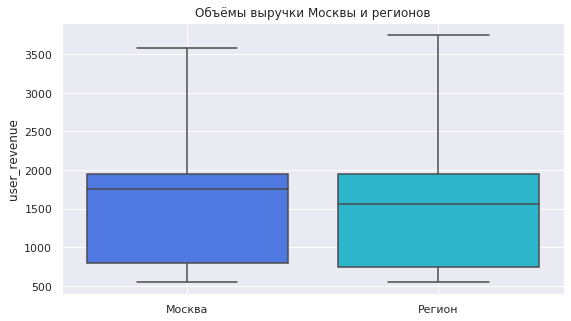

In [70]:
    total_data_city = \
    total_data\
    .groupby('city_cat', as_index=False)\
    .agg({'user_revenue':'median'})\
    .sort_values(by='city_cat', ascending=True).reset_index()

    plt.figure(figsize=(9,5))
    ax = sns.boxplot(x='city_cat', y='user_revenue', data=total_data, showfliers=False, 
                     order=total_data_city['city_cat'].to_list())
    ax.set_xlabel('')
    plt.title('Объёмы выручки Москвы и регионов')
    plt.grid(True)

Диаграммы размаха отличаются не значительно, поэтому можем предположить, что средний чек москвича не будет отличаться от среднего чека жителя любого другого города, проверим наше предположение.  
Напишем функцию, с помощью которой рассчитаем доверительные интервалы для фильтрации данных от выбросов.

In [71]:
total_data_moscow = total_data.query('city_cat == "Москва"')
total_data_region = total_data.query('city_cat != "Москва"')
def interval_city(column):
    quantiles_m = total_data_moscow[column].quantile([0.25, 0.75])
    iqr_m = quantiles_m.iloc[1] - quantiles_m.iloc[0]
    interval_moscow=(max(0, quantiles_m.iloc[0] - 1.5 * iqr_m), quantiles_m.iloc[1] + 1.5 * iqr_m)
    quantiles_r = total_data_region[column].quantile([0.25, 0.75])
    iqr_r = quantiles_r.iloc[1] - quantiles_r.iloc[0]
    interval_region=(max(0, quantiles_r.iloc[0] - 1.5 * iqr_r), quantiles_r.iloc[1] + 1.5 * iqr_r)
    print('Границы интервала для столбца "{}" тарифа {}: {}'.format(column, total_data_moscow['city_cat'].array[0], interval_moscow))
    print('Границы интервала для столбца "{}" тарифа {}: {}'.format(column, total_data_region['city_cat'].array[0], interval_region))
    
    return interval_moscow, interval_region   

In [72]:
int_reg_smart, int_reg_ultra = interval_city('user_revenue')

Границы интервала для столбца "user_revenue" тарифа Москва: (0, 3678.0)
Границы интервала для столбца "user_revenue" тарифа Регион: (0, 3750.0)


Теперь отфильтруем данные в соответствии с интервалами

In [73]:
moscow_data_revenue = total_data_moscow[(total_data_moscow['user_revenue'] >= int_reg_smart[0]) &
                                           (total_data_moscow['user_revenue'] <= int_reg_smart[1])]['user_revenue']
region_data_revenue = total_data_region[(total_data_region['user_revenue'] >= int_reg_ultra[0]) &
                                           (total_data_region['user_revenue'] <= int_reg_ultra[1])]['user_revenue']

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2) .

In [74]:

alpha = 0.05 # зададим критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    moscow_data_revenue, 
    region_data_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2058856276984465
Не получилось отвергнуть нулевую гипотезу


Наши данные не противоречат гипотезе: **средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов**  

Проверим на нашей выборке как отличаются или нет средние значения прибыли по территориальному признаку

In [75]:
print('Средняя выручка по пользователю в месяц в Москве: {:.0f}'.format(moscow_data_revenue.mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.0f}'.format(region_data_revenue.mean()))

Средняя выручка по пользователю в месяц в Москве: 1528
Средняя выручка по пользователю в месяц в регионах: 1486


Средние значения отличаются незначительно, разница - 42 рубля

Интересно посмотреть как распределились пользователи тарифов по территориальному признаку, нарисуем круговую диаграмму

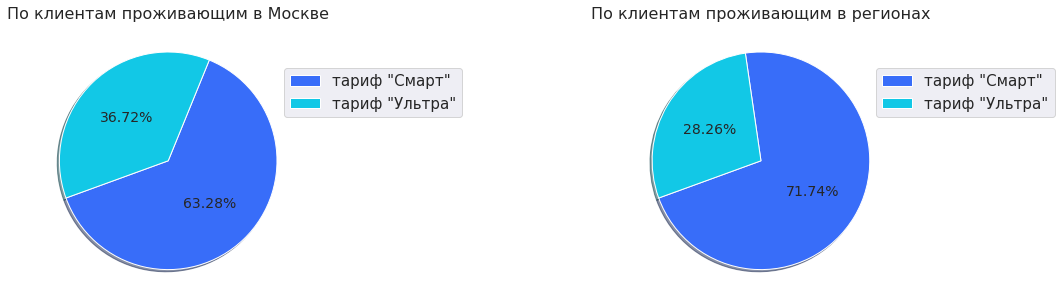

In [76]:
total_data_moscow = total_data.query('city_cat == "Москва"')
total_data_region = total_data.query('city_cat != "Москва"')
filter_list = ['Москва', 'Регион']
titles_list = ['По клиентам проживающим в Москве', 'По клиентам проживающим в регионах']
rows = 1
cols = 2
filter_list_counter = 0

sum_moscow = total_data_moscow['user_id'].count()
sum_region = total_data_region['user_id'].count()

annot_labels = ['тариф "Смарт"', 'тариф "Ультра"']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_moscow)
    else:
        value = float(pct/100.*sum_region)
    return "{:.2f}%".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))

for r in range(rows):
    for c in range(cols):
        
        filter_data = total_data[total_data['city_cat'] == filter_list[filter_list_counter]].groupby('tariff')['user_id']
        ax = filter_data.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True,  
                                           title=titles_list[filter_list_counter], pctdistance=0.55, figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), startangle=200, ax=axes[c], labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['тариф "Смарт"', 'тариф "Ультра"'], bbox_to_anchor=(0.897,0.87), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)
    ax.title.set_position([0.5, 1.15])

Тариф "Смарт" популярен и в Москве, и в регионах, разница совсем небольшая.

**Вывод:**   
* Наши данные не противоречат гипотезе: **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**  

* Наши данные не противоречат гипотезе: **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов** 

# 6. Общий вывод <a name="вывод"></a>

Посмотрим какой средний процент использования пакетов услуг, включенных в тарифный пакет, для каждого тарифа

In [77]:
smart_int_mean = (total_data_smart['internet_mb'] / (1024 * 15)).mean()
smart_min_mean = (total_data_smart['calls_min_sum'] / 500).mean()
smart_sms_mean = (total_data_smart['sms_count'] / 50).mean()
ultra_int_mean = (total_data_ultra['internet_mb'] / (1024 * 30)).mean()
ultra_min_mean = (total_data_ultra['calls_min_sum'] / 3000).mean()
ultra_sms_mean = (total_data_ultra['sms_count'] / 1000).mean()

In [78]:
print('Средний процент использования пакета интернет-трафика по тарифу "Смарт" - {:.2%} = {:,.0f} Гб'.
      format(smart_int_mean, smart_int_mean * 1024 * 15))
print('Средний процент использования пакета минут разговоров по тарифу "Смарт" - {:.2%} = {:,.0f} мин'.
      format(smart_min_mean, smart_min_mean * 500))
print('Средний процент использования пакета смс-сообщений по тарифу "Смарт" - {:.2%} = {:,.0f} шт.'.
      format(smart_sms_mean, smart_sms_mean * 50))
print('*************************************************************************************************')
print('Средний процент использования пакета интернет-трафика по тарифу "Ультра" - {:.2%} = {:,.0f} Гб'.
      format(ultra_int_mean, ultra_int_mean * 1024 * 30))
print('Средний процент использования пакета минут разговоров по тарифу "Ультра" - {:.2%} = {:,.0f} мин'.
      format(ultra_min_mean, ultra_min_mean * 3000))
print('Средний процент использования пакета смс-сообщений по тарифу "Ультра" - {:.2%} = {:,.0f} шт.'.
      format(ultra_sms_mean, ultra_sms_mean * 1000))

Средний процент использования пакета интернет-трафика по тарифу "Смарт" - 105.67% = 16,231 Гб
Средний процент использования пакета минут разговоров по тарифу "Смарт" - 83.89% = 419 мин
Средний процент использования пакета смс-сообщений по тарифу "Смарт" - 66.78% = 33 шт.
*************************************************************************************************
Средний процент использования пакета интернет-трафика по тарифу "Ультра" - 63.44% = 19,490 Гб
Средний процент использования пакета минут разговоров по тарифу "Ультра" - 18.26% = 548 мин
Средний процент использования пакета смс-сообщений по тарифу "Ультра" - 4.88% = 49 шт.


**По тарифу "Ультра" всё прекрасно, в среднем абонент не использует полностью все услуги, которые включены в пакет:**  

* из 30 Гб включенных в тариф "Ультра" в среднем в месяц абонент использует 20 Гб  
* из 3000 минут включенных в тариф "Ультра" в среднем в месяц абонент выговаривает 550 минут  
* из 1000 сообщений включенных в тариф "Ультра" в среднем в месяц абонент отправляет 50 сообщений  

**По тарифу "Смарт" не всё так хорошо, в среднем абонент использует практически полностью все услуги, которые включены в пакет:** 

* из 15 Гб включенных в тариф "Смарт" в среднем в месяц абонент использует всё и докупает сверх пакета 2 Гб  
* из 500 минут включенных в тариф "Смарт" в среднем в месяц абонент выговаривает 419 минут , т.е. практически использует все минуты   
* из 50 сообщений включенных в тариф "Ультра" в среднем в месяц абонент отправляет 33 сообщения  

Посмотрим какое в среднем превышение по услугам у абонентов тарифов

In [79]:
smart_int_over = (total_data_smart['internet_overlimit'] / 1024).mean()
smart_min_over = (total_data_smart['min_overlimit']).mean()
smart_sms_over = (total_data_smart['sms_overlimit']).mean()
ultra_int_over = (total_data_ultra['internet_overlimit']/ 1024).mean()
ultra_min_over = (total_data_ultra['min_overlimit']).mean()
ultra_sms_over = (total_data_ultra['sms_overlimit']).mean()

In [80]:
print('Среднee превышение пакета интернет-трафика по тарифу "Смарт" - {:,.2f} Гб'.
      format(smart_int_over))
print('Среднее превышение пакета минут разговоров по тарифу "Смарт" {:,.0f} мин'.
      format(smart_min_over))
print('Среднее превышение пакета смс-сообщений по тарифу "Смарт" {:,.0f} шт.'.
      format(smart_sms_over))
print('******************************************************************************')
print('Среднee превышение пакета интернет-трафика по тарифу "Ультра" {:,.2f} Гб'.
      format(ultra_int_over))
print('Среднее превышение пакета минут разговоров по тарифу "Ультра" {:,.0f} мин'.
      format(ultra_min_over))
print('Среднее превышение пакета смс-сообщений по тарифу "Ультра" {:,.0f} шт.'.
      format(ultra_sms_over))

Среднee превышение пакета интернет-трафика по тарифу "Смарт" - 2.71 Гб
Среднее превышение пакета минут разговоров по тарифу "Смарт" 42 мин
Среднее превышение пакета смс-сообщений по тарифу "Смарт" 6 шт.
******************************************************************************
Среднee превышение пакета интернет-трафика по тарифу "Ультра" 0.75 Гб
Среднее превышение пакета минут разговоров по тарифу "Ультра" 0 мин
Среднее превышение пакета смс-сообщений по тарифу "Ультра" 0 шт.


### Вывод:

* Абоненты "Мегалайн", которые пользуются тарифом "Смарт" приносят оператору практически 60% выручки, остальные 40% - это выручка от клиентов тарифа"Ультра" (которых всего 30% от общего числа клиентов).   
  
  
* Среднему клиенту тарифа "Ультра" хватает услуг включенных в пакет тарифа, иногда он дозаказывает 1 Гб интернета  
  
  
* Среднему клиенту тарифа "Смарт" не хватает 2-3 Гб интернет-трафика  и он дозаказывает эту услугу за дополнительные 400-600 рублей  
  
  
* Думаю потенциальному клиенту "Мегалайн" не хватает тарифа, который занимал бы промежуточное значение, между этими тарифами.   
С учетом того, что средний чек по оплате услуг клиентом тарифа "Смарт" состаляет 1250 рублей, значит это та сумма, которую он готов отдавать за услуги связи. Стоит посоветовать "Мегалайн" разработать тариф с увеличенными относительно "Смарт" пакетами услуг и абонентской платой 1200-1300 рублей
